In [20]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [21]:
# Custom Packages

from BPCA import *

from AccuracyMetrics import *
from KNN import *


In [42]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)

In [24]:
X_train2_cmp, X_test2_cmp = trainPCA(X_train2, X_test2)

X_train Variance: 0.9287852222496773
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [25]:
y_test2 = getTestLabelsKNN(7, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

In [33]:
y_test2

array([ 9,  1,  6,  4,  6,  5,  6,  6,  8, 11,  3,  1,  3,  3,  1,  1,  4,
        4,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  6,  1,
        4,  4,  6,  8,  6,  6,  6,  6,  6,  8,  6,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  6,  6,  6,  6,  6,  8,  6,  6,
        6,  6,  9,  8,  2,  6])

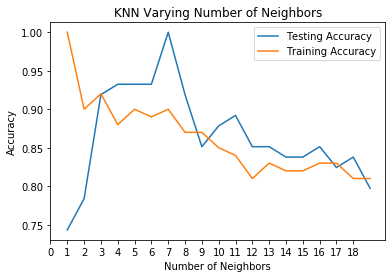

In [26]:
plotK(n2, test_acc2, train_acc2)

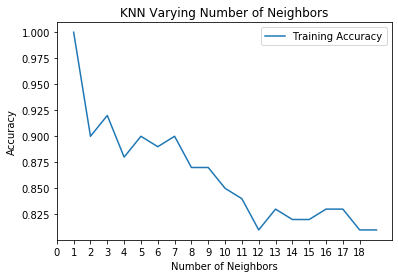

In [27]:
n_neighbors2, train_accuracy2 = testK(X_train2_cmp, y_train2)
plotTestK(neighbors2, train_accuracy2)

In [28]:
y_test2 = getTestLabelsKNN(7, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

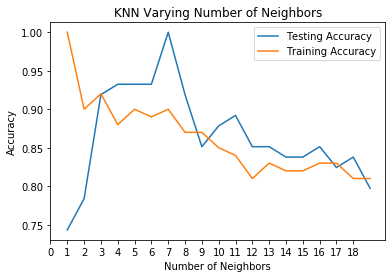

In [29]:
plotK(n2, test_acc2, train_acc2)

In [30]:
n_neighbors2=3
knn_score2, knn_y_pred2 = runKNN(n_neighbors2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.918918918918919


In [31]:
getScoresKNN(n_neighbors2, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=3: 0.918918918918919

KNN Confusion Matrix, k=3

[[15  0  0  1  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=3

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         4
           4       0.95      0.95      0.95        19
           5       1.00      1.00      1.00         1
           6       0.96      0.96      0.96        23
           8       1.00      1.00      1.00         5
           9       0.50      0.33      0.40         3
          11       0.50      1.00      0.67         1

    accuracy                           0.92        74
   macro avg       0.80  

Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,15,0,0,1,0,0,0,0,1,17
2,0,1,0,0,0,0,0,0,0,1
3,0,0,4,0,0,0,0,0,0,4
4,0,0,0,18,0,0,0,1,0,19
5,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,22,0,0,0,23
8,0,0,0,0,0,0,5,0,0,5
9,0,1,0,0,0,1,0,1,0,3
11,0,0,0,0,0,0,0,0,1,1


In [81]:
def calcMultiClassROCAUC(X_train, y_train, X_test, y_test, **kwargs):
    for k,v in kwargs.items():
        model = kwargs['model']
        tuner = kwargs['tuner']
        tuner_val = kwargs['tuner_val']
        dec = kwargs['dec']
        labels = kwargs['labels']
        
    y_train_bin = label_binarize(y_train, classes=labels)
    n_classes = y_train_bin.shape[1]
    y_test_bin = label_binarize(y_test, classes=labels)

    clf = OneVsRestClassifier(OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=0)))
    y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],  label=f'{model} Micro-Avg Area: {round(roc_auc["micro"], 4)}')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{model} Area: {round(roc_auc[i], 4)}')
        if dec == True:
            plt.title(f'{model} ROC Curve, Label {labels[i]}, {tuner}={tuner_val}')
            tuner_val -= 1
        else:
            plt.title(f'{model} ROC Curve, Label {labels[i]}')
        plt.plot([0, 1], [0, 1], label='tpr-fpr line')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.legend()
        plt.show()

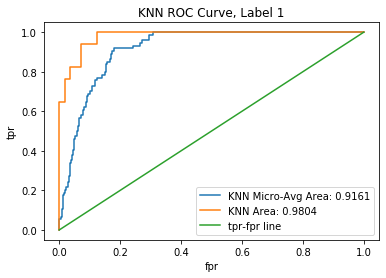

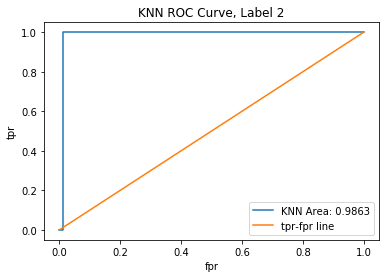

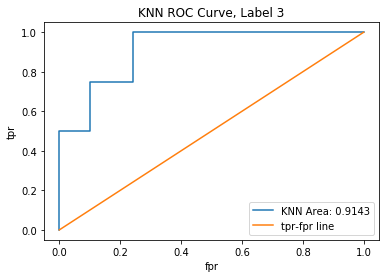

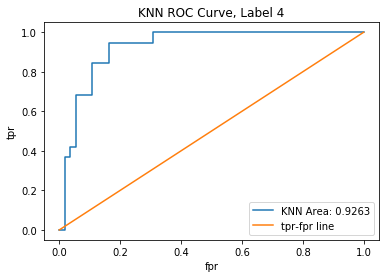

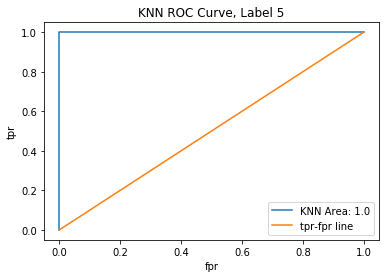

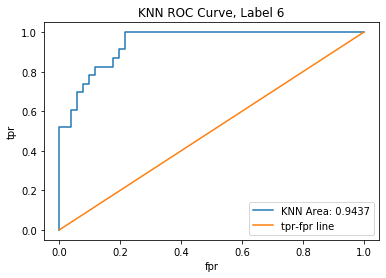

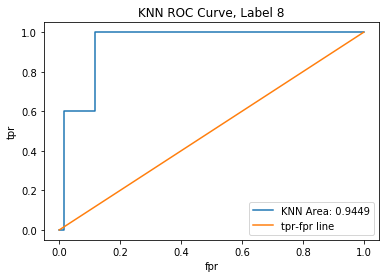

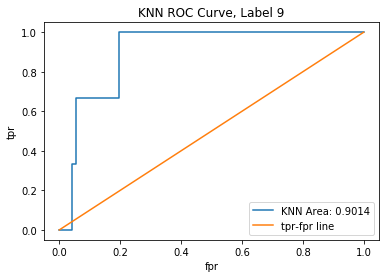

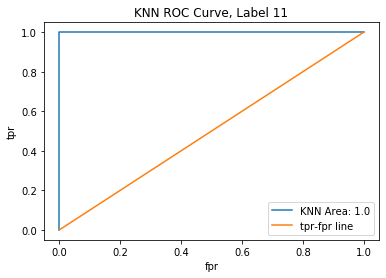

In [82]:
labels = [1,2,3,4,5,6,8,9,11]

calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, model='KNN', tuner='k',\
 tuner_val=n_neighbors2, labels=labels, dec=False)

In [19]:
## PLACEHOLDER FOR SVM DS4